# Importing necessary liblraries

In [ ]:
# Firstly we will load the libraries that we require as seen below
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

Installing missingno library for analysing the **missing values**.

In [ ]:
pip install missingno

# Loading Training and Testing Datasets

In [ ]:
#	We will load both the Train and test data using read.csv () function. Merge both of them using concat() function.
#	And see the result by using head () function which will show the first five rows of the dataset.
titanic_train_data = pd.read_csv('train.csv')
titanic_test_data = pd.read_csv('test.csv')

Concating training and testing dataset for preprocessing it.

In [ ]:
titanic_data = pd.concat([titanic_train_data,titanic_test_data])

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


Checking the information of the dataset


*   Analysing the datatype of each column
*   Analysing the total number of records



In [ ]:
#Whenever we get any data we will see the information that we have with us using info () function, in it we can see the column names, data types, and non-null count
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Unnamed: 12  0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


# Missing Values

Checking the number of missing values in a dataset.

In [ ]:
#Now we will check for the null values in our dataset.

#Using is null () which will give answer in TRUE or FALSE. By using the sum () function with it will provide the total null values in each column.

#Generally we fill the columns that are essential (ex- Age) and drop the ones which are not (ex-Name, Passenger ID etc.).
titanic_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Unnamed: 12    1309
dtype: int64

Ploting the number of records each column have with the help of missingno liblrary

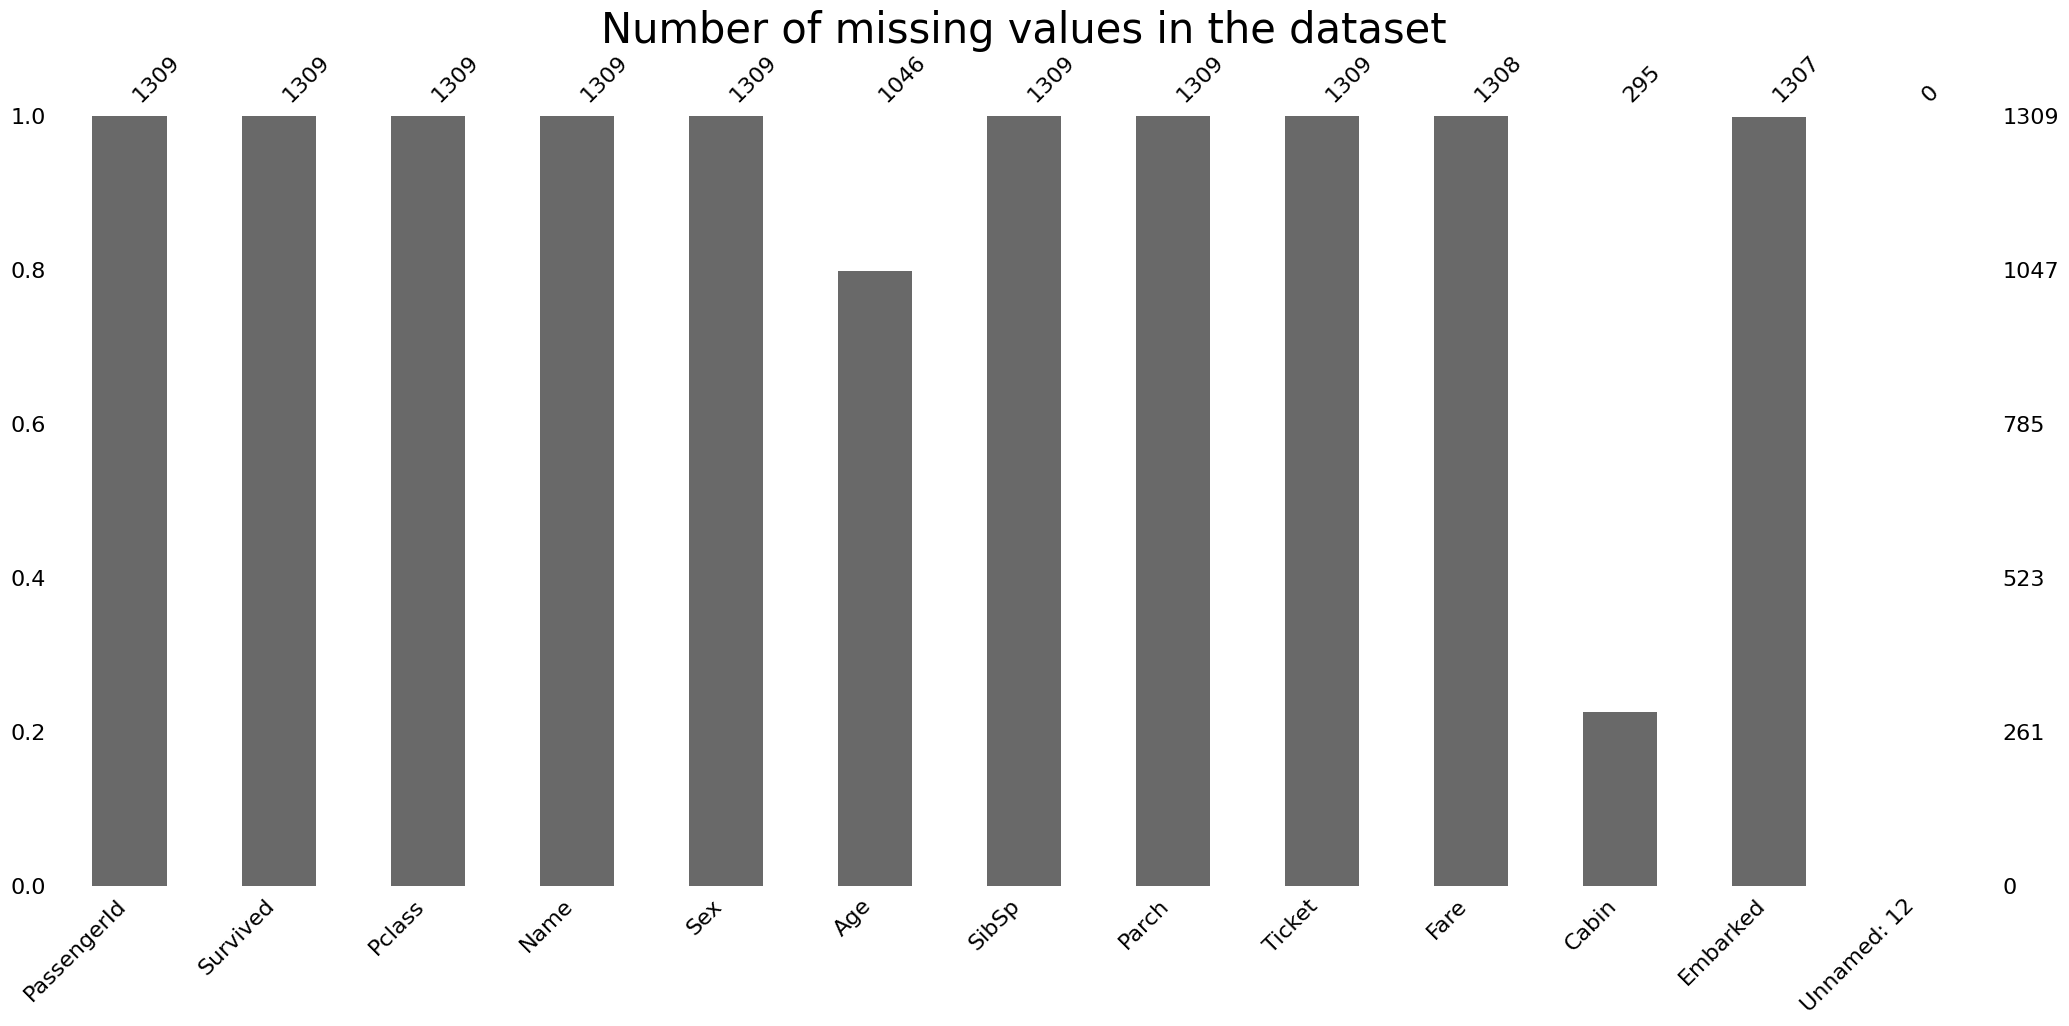

In [ ]:
msno.bar(titanic_data)
plt.title('Number of missing values in the dataset',size=30)
plt.show()

Visualizing the Null values distribution all over the dataset with the help of missingno

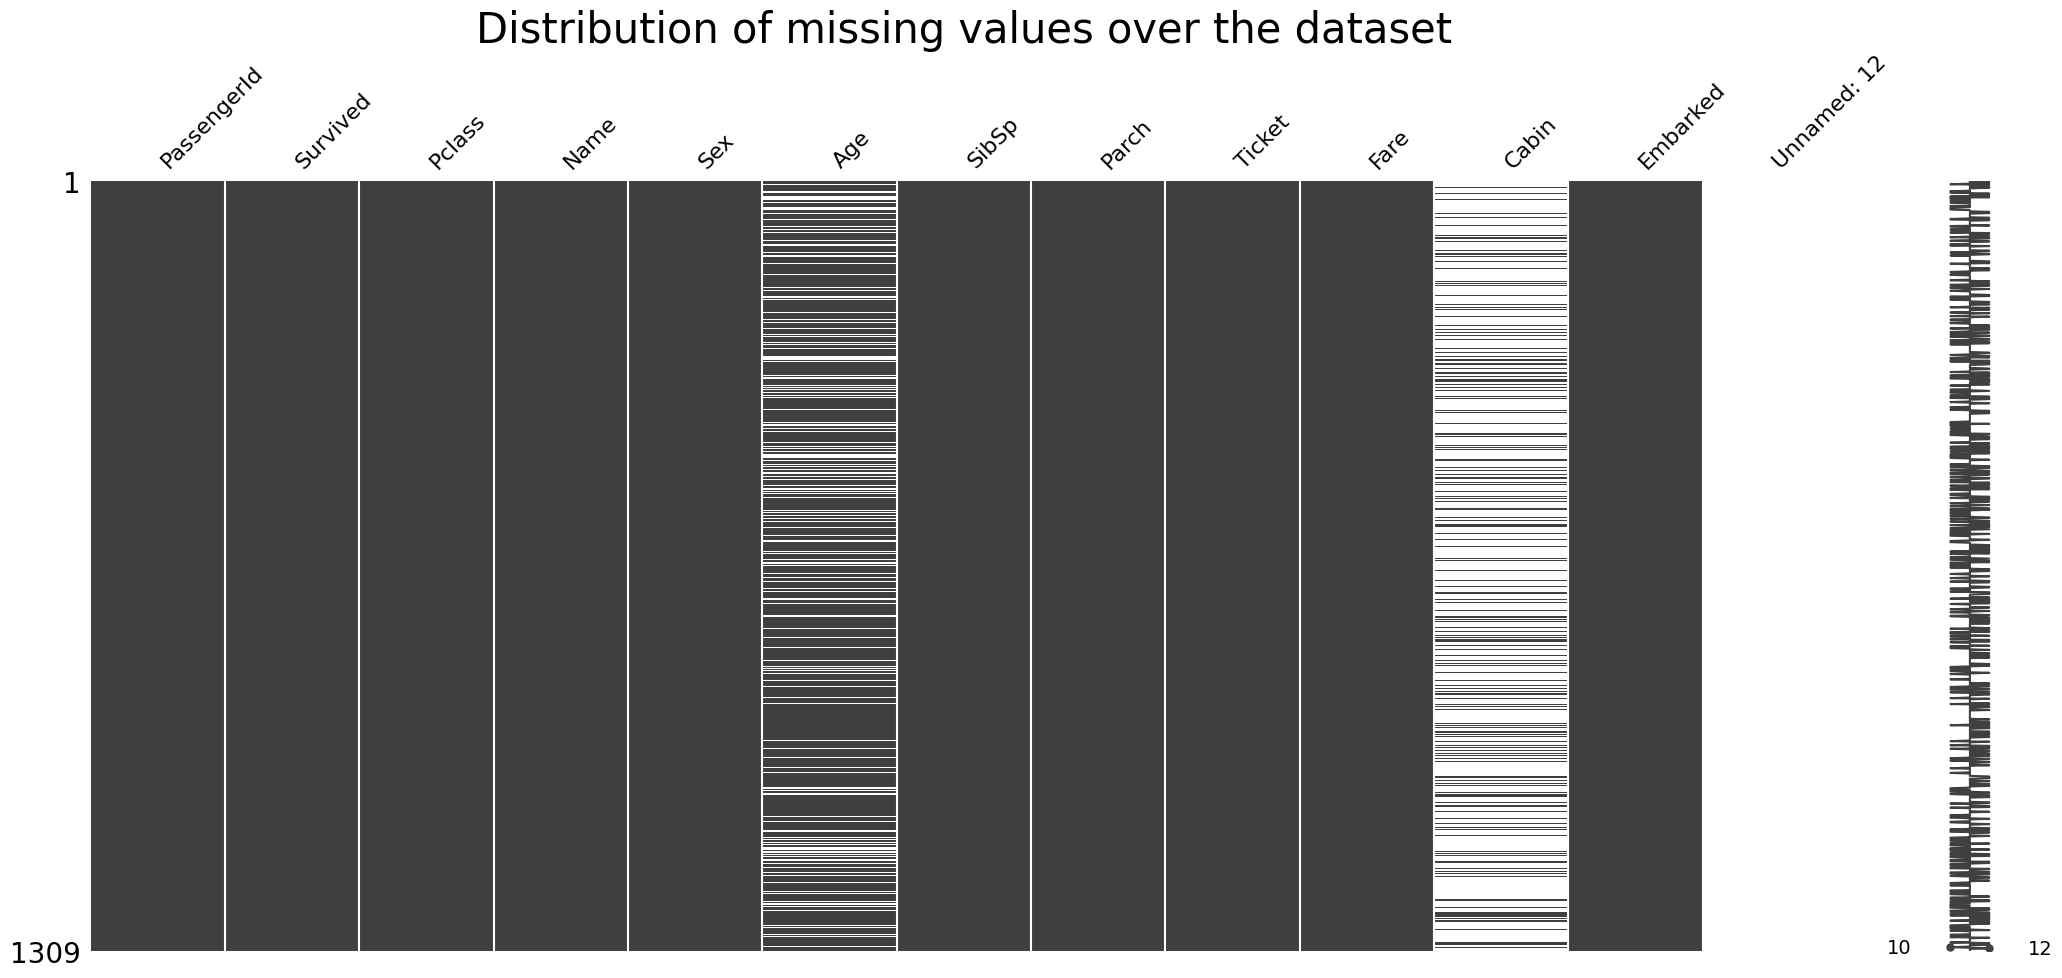

In [ ]:
msno.matrix(titanic_data)
plt.title('Distribution of missing values over the dataset',size=30)
plt.show()

Relationships between two predictor variables(Age and Fare) using the seaborn regressin plot and setting title,grid and figure size with the help of matplotlib.

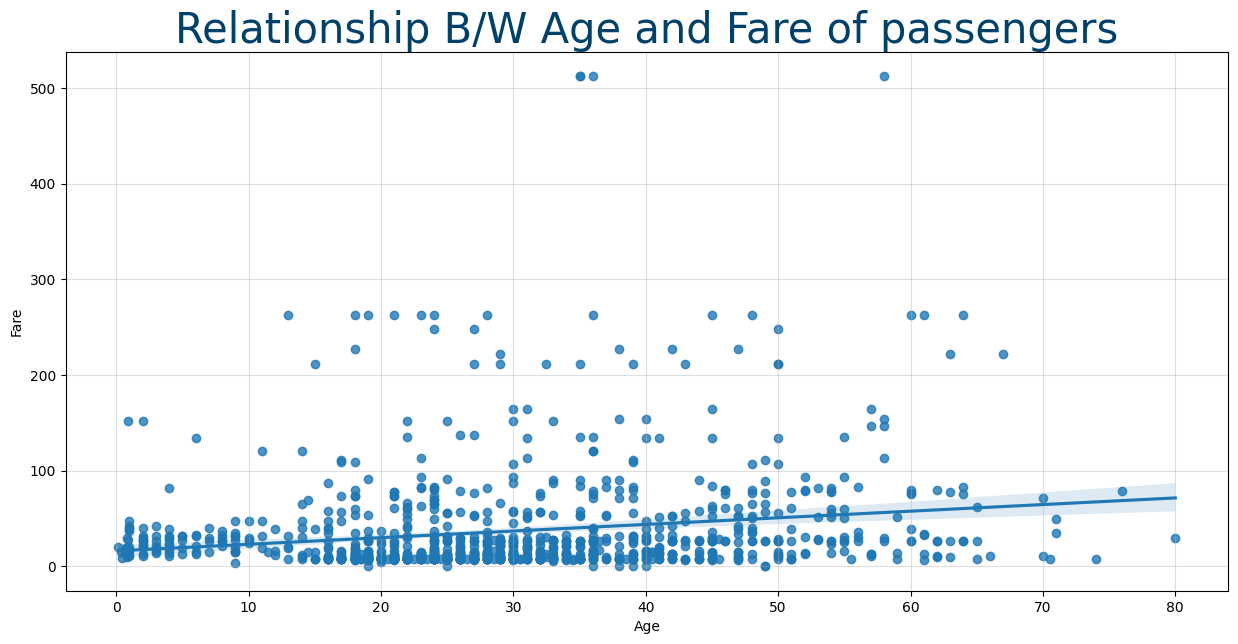

In [ ]:
# Now we will try to visualize our data by making some graphs for ourselves so that we know what we are dealing with.
# 1st graph, it’s a regression plot between Age and Fare. Normally we see that as age increases Fare price is also increasing.
# plt.figure(figsize=(15,7))
# sns.regplot(data=titanic_data,x='Age',y='Fare')
plt.title('Relationship B/W Age and Fare of passengers',size=30,color='#00416A')
plt.grid(alpha=0.4)
plt.show()

There is a incorrect value (11) in the Survived column in the rows shown bellow

In [ ]:
titanic_data[titanic_data['Survived']==11]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
181,896,11,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
369,897,11,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,NaN
408,893,11,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN


In [ ]:
titanic_data['Survived'].value_counts()

0     821
1     485
11      3
Name: Survived, dtype: int64

Replacing 11 with 1 for solving the incorrect value problem

In [ ]:
titanic_data['Survived'].replace(11,1,inplace=True)

In [ ]:
titanic_data['Survived'].value_counts()

0    821
1    488
Name: Survived, dtype: int64

Relationships between a predictor variable and the predicted (target) variable(Age and Survived) using the seaborn regressin plot and setting title,grid and figure size with the help of matplotlib.

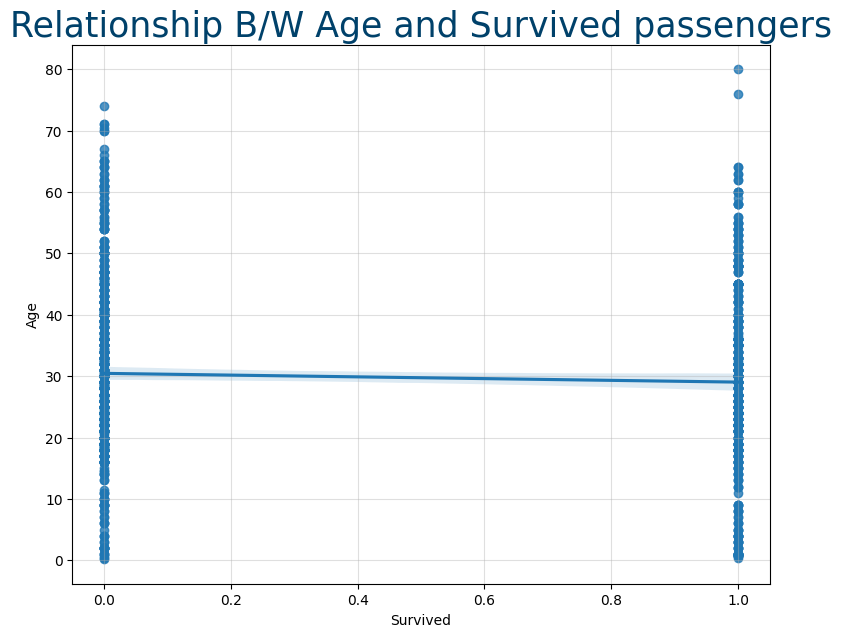

In [ ]:
# Likewise here we have another regression plot between Age and Survived. Here there is not any significant difference between the age of the people who survived and those who couldn’t.
# Here we have given the size and colour (Hex code of a colour we want).
plt.figure(figsize=(9,7))
sns.regplot(data=titanic_data,x='Survived',y='Age')
plt.title('Relationship B/W Age and Survived passengers',size=25,color='#00416A')
plt.grid(alpha=0.4)
plt.show()

Now we are checking the correlation between the predictor variables and the target variable(Survived). So we can understand which feature effect most the target column.

In [ ]:
corr = titanic_data.corr()[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

<ipython-input-20-c4570c4a2933>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic_data.corr()[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]


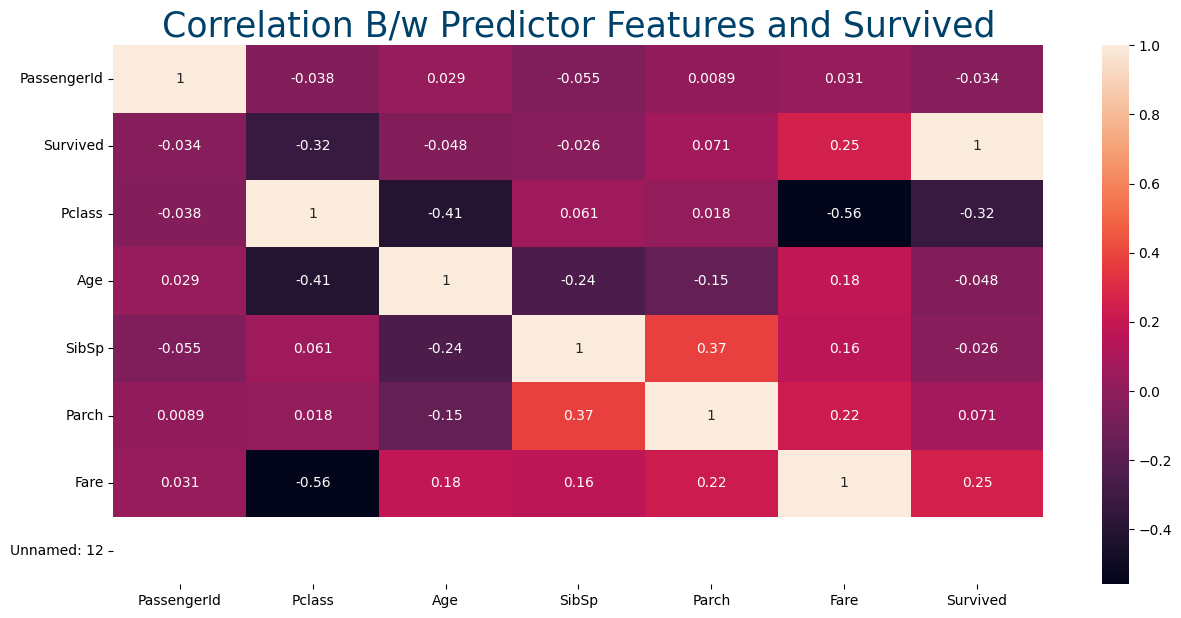

In [ ]:
#Here above we calculate the correlation first and the arrange the columns for better representations
	       #And then we plot the heat map with the help of the seaborne library.

plt.figure(figsize=(15,7))
sns.heatmap(data=corr,annot=True)
plt.title('Correlation B/w Predictor Features and Survived',size=25,color='#00416A')
plt.show()

A count plot showing the number of people who survived and people with not survived.



# Visualizing Data to understand the data and filling the missing values

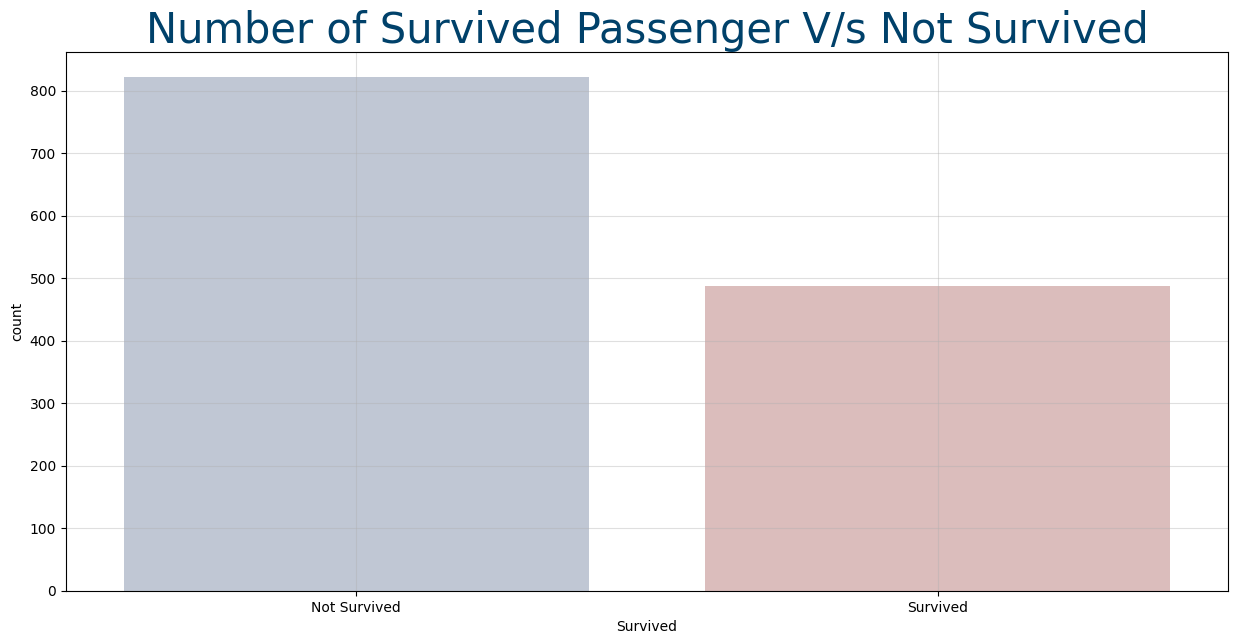

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Survived',palette='vlag')
plt.title('Number of Survived Passenger V/s Not Survived',size=30,color='#00416A')
plt.grid(alpha=0.4)
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()


Here we see Gender wise the people Survived and not Survived. Certainly it is seen that females are given preference over male while evacuating the people.


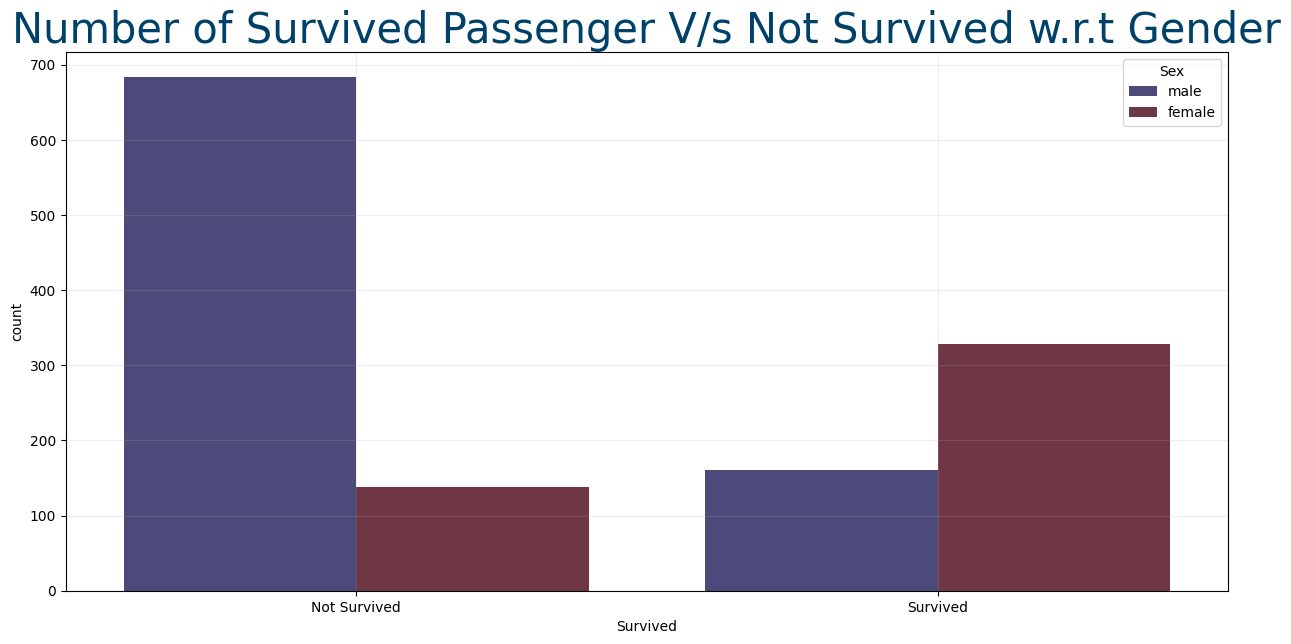

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Survived',hue='Gender',palette='icefire')
plt.title('Number of Survived Passenger V/s Not Survived w.r.t Gender',size=30,color='#00416A')
plt.grid(alpha=0.2)
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()

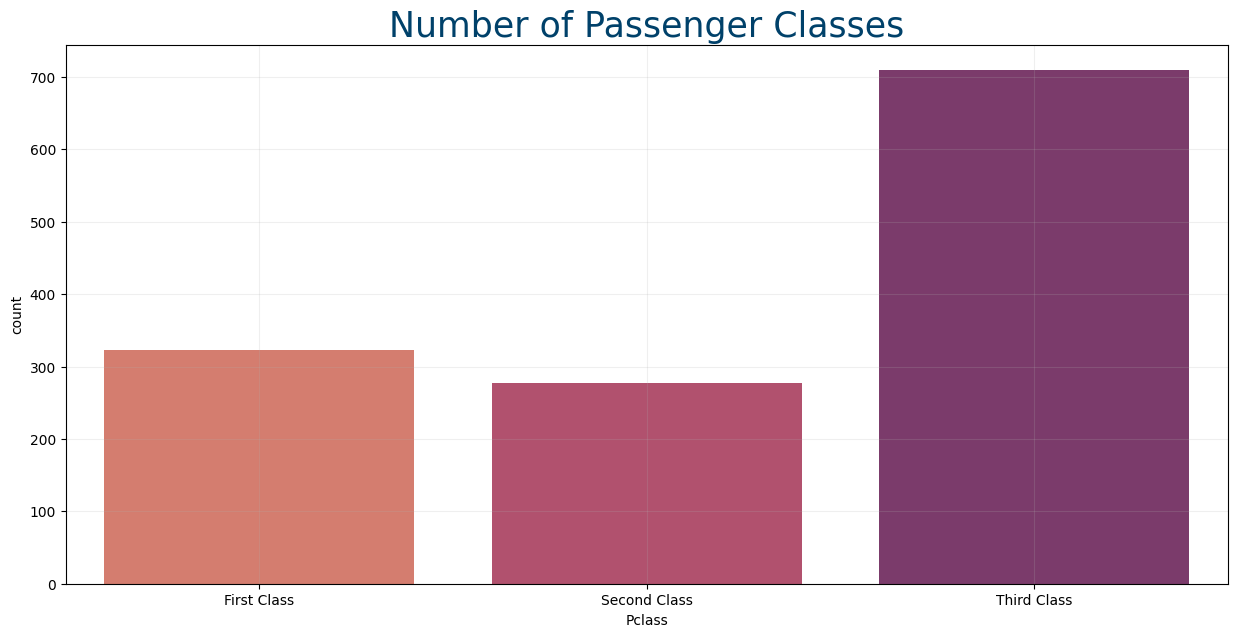

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Pclass',palette='flare')
plt.title('Number of Passenger Classes',size=25,color='#00416A')
plt.grid(alpha=0.2)
plt.xticks([0,1,2],['First Class','Second Class','Third Class'])
plt.show()

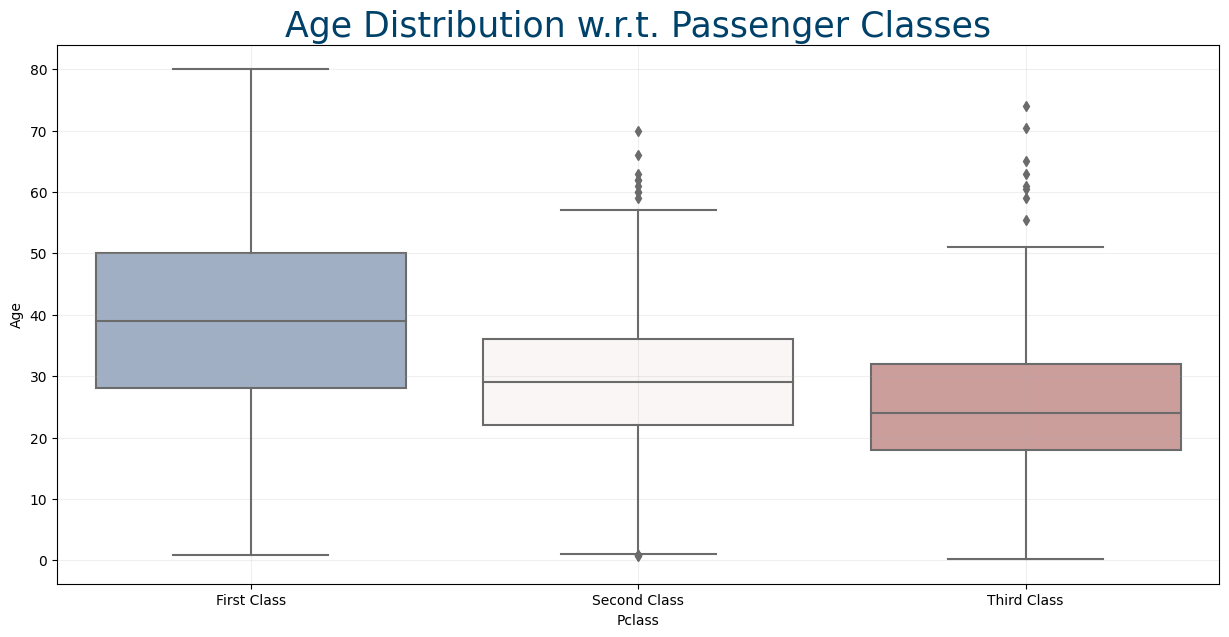

In [ ]:
#Now here is a boxplot showing the Age distribution with respect to Passenger classplt.figure(figsize=(15,7))
sns.boxplot(data=titanic_data,x='Pclass',y='Age',palette='vlag')
plt.title('Age Distribution w.r.t. Passenger Classes',size=25,color='#00416A')
plt.grid(alpha=0.2)
plt.xticks([0,1,2],['First Class','Second Class','Third Class'])
plt.show()

Now here’s a Boxplot which will be very useful when we will be filling the values in the Age Column. Boxplot shows us the mean age of Males and Female according to the class. The diamond like shape are the outliers in our dataset, which are numbered so that will not be a problem

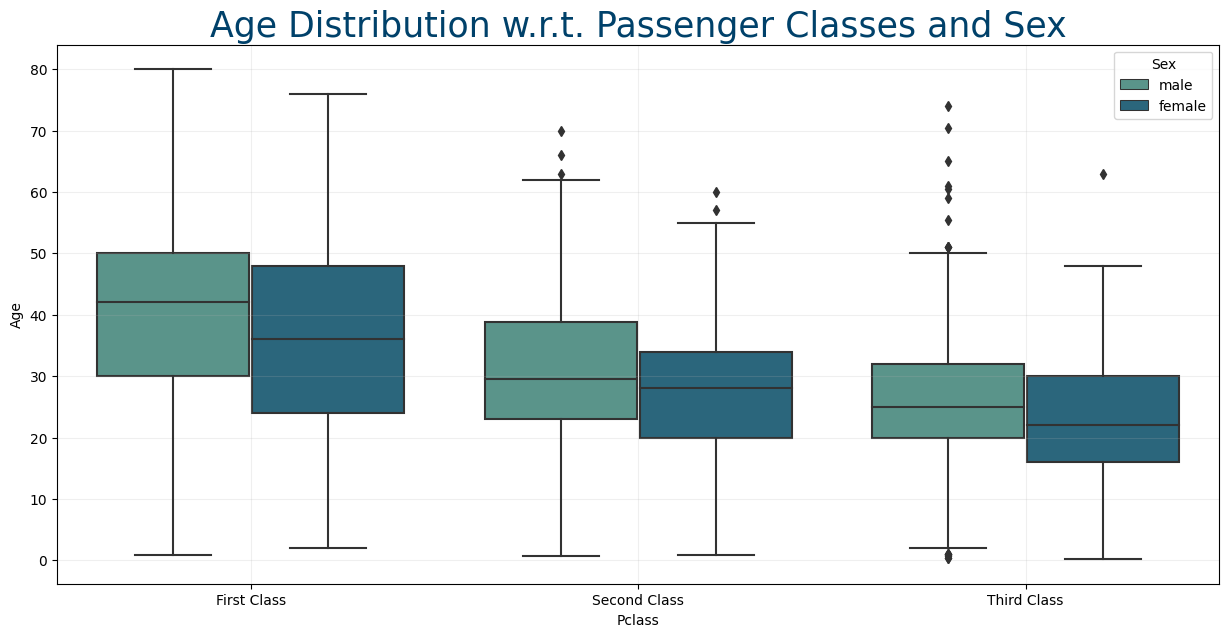

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=titanic_data,x='Pclass',y='Age',hue='Gender',palette='crest')
plt.title('Age Distribution w.r.t. Passenger Classes and Gender',size=25,color='#00416A')
plt.xticks([0,1,2],['First Class','Second Class','Third Class'])
plt.grid(alpha=0.2)
plt.show()

# Fix missing/incorrect data fields.



In [ ]:
titanic_data[titanic_data['Gender']=='male'].groupby(by='Pclass').mean()

<ipython-input-21-455510ace10f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic_data[titanic_data['Sex']=='male'].groupby(by='Pclass').mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare,Unnamed: 12
Pclass,,,,,,,
1,658.687151,0.340782,41.029272,0.340782,0.279330,69.888385,NaN
2,695.976608,0.140351,30.815380,0.327485,0.192982,19.904946,NaN
3,645.888438,0.152130,25.962264,0.470588,0.255578,12.415462,NaN


In [ ]:
titanic_data[titanic_data['Gender']=='female'].groupby(by='Pclass').mean()

<ipython-input-22-dfa5410ba936>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic_data[titanic_data['Sex']=='female'].groupby(by='Pclass').mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare,Unnamed: 12
Pclass,,,,,,,
1,689.652778,0.965278,37.037594,0.555556,0.472222,109.412385,NaN
2,632.188679,0.867925,27.499223,0.500000,0.650943,23.234827,NaN
3,628.393519,0.449074,22.185329,0.791667,0.731481,15.324250,NaN


In [ ]:
def fill_age(row):
  pclass = row[0]
  age = row[1]
  gender = row[2]
  if pd.isnull(age):
    if gender=='male':
      if pclass==1:
        return 41
      elif pclass==2:
        return 30
      elif pclass==3:
        return 25
    elif gender=='female':
      if pclass==1:
        return 37
      elif pclass==2:
        return 27
      elif pclass==3:
        return 22
  else:
    return age

In [ ]:
titanic_data['Age'] = titanic_data[['Pclass','Age','Gender']].apply(fill_age,axis=1)

In [ ]:
titanic_data['Has Cabin'] = titanic_data["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1)

In [ ]:
titanic_data['Has Cabin'].value_counts()

0    1014
1     295
Name: Has Cabin, dtype: int64

In [ ]:
titanic_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Unnamed: 12    1309
Has Cabin         0
dtype: int64

In [ ]:
titanic_data.drop(['PassengerId','Name','Ticket','Unnamed: 12',"Cabin"],axis=1,inplace=True)

In [ ]:
titanic_data.dropna(inplace=True)

In [ ]:
titanic_data.reset_index(drop=True,inplace=True)

In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has Cabin
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


# Using 'Feature engineering,' to create new features from the original data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
label_enco = LabelEncoder()
one_hot = OneHotEncoder()

In [ ]:
label_enco.fit(titanic_data['Gender'])

LabelEncoder()

In [ ]:
titanic_data['Gender'] = label_enco.transform(titanic_data['Gender'])

In [ ]:
one_hot.fit(titanic_data[['Embarked']])

OneHotEncoder()

In [ ]:
temp_arr = one_hot.transform(titanic_data[['Embarked']]).toarray()

In [ ]:
temp_arr

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
one_hot.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
temp_data = pd.DataFrame(temp_arr,columns=['C', 'Q', 'S'],dtype='int')

In [ ]:
temp_data.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
titanic_data = pd.concat([titanic_data,temp_data],axis=1)

In [ ]:
titanic_data.drop('Embarked',axis=1,inplace=True)

In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has Cabin,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,1


# Build and tune the model

In [ ]:
X = titanic_data.drop('Survived',axis=1)
Y = titanic_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [ ]:
logistic_model = logistic.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Report model performance results.
logistic_model_accuracy = logistic_model.score(X_test, Y_test)
#Change this
print('Model Accuracy is {0:.2F}%'.format(logistic_model_accuracy * 100))

Model Accuracy is 82.06%


# SOME QUESTIONS

How is survival influenced based on passenger ticket class?

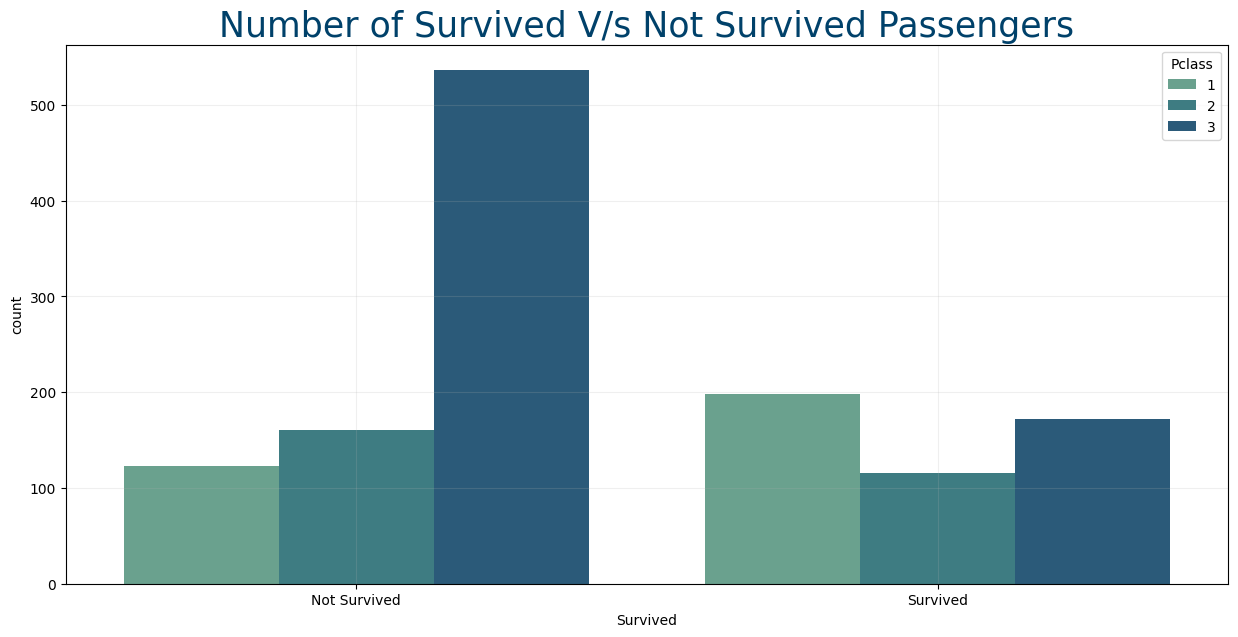

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Survived',hue='Pclass',palette='crest')
plt.title('Number of Survived V/s Not Survived Passengers',size=25,color='#00416A')
plt.xticks([0,1],['Not Survived','Survived'])
plt.grid(alpha=0.2)
plt.show()

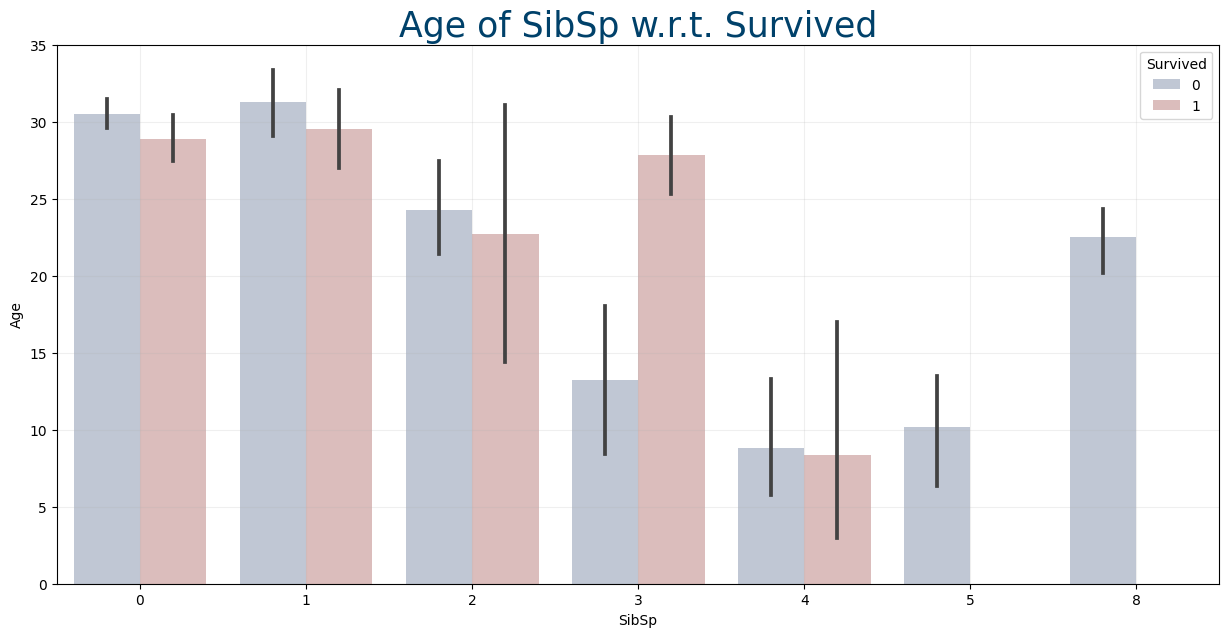

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=titanic_data,x='SibSp',y='Age',hue='Survived',palette='vlag')
plt.title('Age of SibSp w.r.t. Survived',size=25,color='#00416A')
plt.grid(alpha=0.2)
plt.show()